In [1]:
from services.load_dataset import load_data
from services.modeling import create_sequences, apply_smote, train_and_plot_results
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

X_train_seq_datasets_original = []
y_train_seq_datasets_original = []
X_train_seq_datasets = []
y_train_seq_datasets = []

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))

# Vary the X_train and y_train size to see how it affects the privacy
# Take last 90%, 80%, ... 10% of the dataset
for i in range(1, 21):
    X_train_ds = X_train[:int(len(X_train) * i / 20)]
    y_train_ds = y_train[:int(len(y_train) * i / 20)]
    X_train_seq_original, y_train_seq_original = create_sequences(X_train_ds, y_train_ds, best_hp['sequence_length'])
    X_train_seq, y_train_seq = apply_smote(X_train_seq_original, y_train_seq_original, sampling_strategy=0.25)

    X_train_seq_datasets_original.append(X_train_seq_original)
    y_train_seq_datasets_original.append(y_train_seq_original)
    X_train_seq_datasets.append(X_train_seq)
    y_train_seq_datasets.append(y_train_seq)
    

X_train_seq, y_train_seq = X_train_seq_datasets[-1], y_train_seq_datasets[-1]
X_val_seq, y_val_seq = create_sequences(X_val, y_val, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\e

In [2]:
import pandas as pd
# count the number of classes and percentages in the training dataset
print('Number of classes in the training dataset')
print(pd.Series(y_train).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train).value_counts()[0] / len(y_train) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train).value_counts()[1] / len(y_train) * 100:.2f}%')
print('Number of classes in the validation dataset')
print(pd.Series(y_val).value_counts())
print(f'Percentage of class 0: {pd.Series(y_val).value_counts()[0] / len(y_val) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_val).value_counts()[1] / len(y_val) * 100:.2f}%')
print('Number of classes in the test dataset')
print(pd.Series(y_test).value_counts())
print(f'Percentage of class 0: {pd.Series(y_test).value_counts()[0] / len(y_test) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_test).value_counts()[1] / len(y_test) * 100:.2f}%')

print('Number of classes in the training dataset after applying SMOTE')
print(pd.Series(y_train_seq).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train_seq).value_counts()[0] / len(y_train_seq) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train_seq).value_counts()[1] / len(y_train_seq) * 100:.2f}%')

Number of classes in the training dataset
0.0    157515
1.0       353
Name: count, dtype: int64
Percentage of class 0: 99.78%
Percentage of class 1: 0.22%
Number of classes in the validation dataset
0.0    50743
1.0       40
Name: count, dtype: int64
Percentage of class 0: 99.92%
Percentage of class 1: 0.08%
Number of classes in the test dataset
0.0    76057
1.0       99
Name: count, dtype: int64
Percentage of class 0: 99.87%
Percentage of class 1: 0.13%
Number of classes in the training dataset after applying SMOTE
0    151967
1     37991
Name: count, dtype: int64
Percentage of class 0: 80.00%
Percentage of class 1: 20.00%


X_train_seq shape: (9368, 20, 29)
y_train_seq shape: (9368,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)

Epoch 1/10


293/293 [==============================] - 21s 53ms/step - loss: 0.1752 - accuracy: 0.5269 - precision: 0.2325 - recall: 0.5937 - auc: 0.5632 - val_loss: 0.1731 - val_accuracy: 0.5105 - val_precision: 0.0159 - val_recall: 0.5358 - val_auc: 0.5439
Epoch 2/10
293/293 [==============================] - 13s 46ms/step - loss: 0.1707 - accuracy: 0.5692 - precision: 0.2260 - recall: 0.4762 - auc: 0.5421 - val_loss: 0.1727 - val_accuracy: 0.5204 - val_precision: 0.0164 - val_recall: 0.5385 - val_auc: 0.5532
Epoch 3/10
293/293 [==============================] - 12s 41ms/step - loss: 0.1665 - accuracy: 0.6221 - precision: 0.2340 - recall: 0.3914 - auc: 0.5477 - val_loss: 0.1721 - val_accuracy: 0.5367 - val_precision: 0.0166 - val_recall: 0.5277 - val_auc: 0.5599
Epoch 4/10
293/293 [==============================] - 12s 41ms/step - loss: 0.1634 - accuracy: 0.6519 -

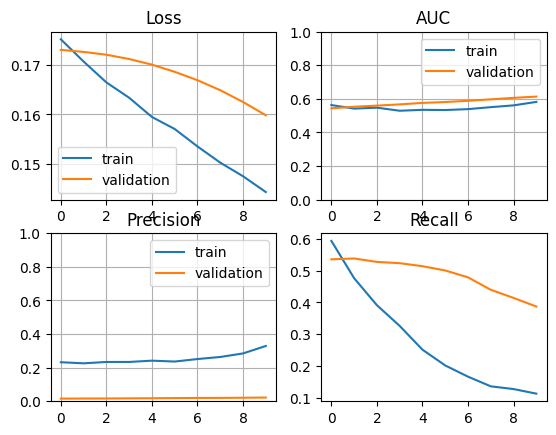

2380/2380 [==============================] - 12s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     74280
           1       0.03      0.39      0.06      1857

    accuracy                           0.69     76137
   macro avg       0.50      0.54      0.43     76137
weighted avg       0.96      0.69      0.79     76137

Confusion Matrix:


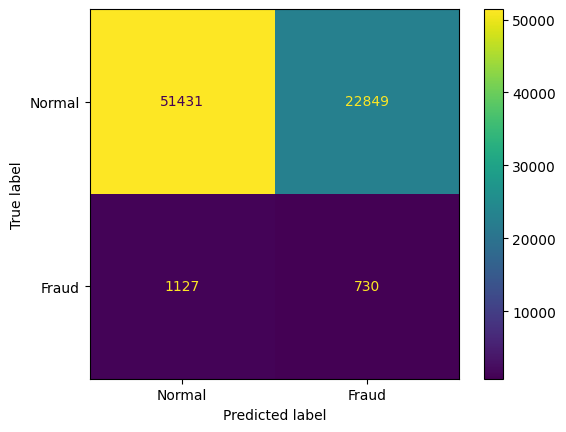

X_train_seq shape: (18191, 20, 29)
y_train_seq shape: (18191,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
569/569 [==============================] - 20s 30ms/step - loss: 0.1785 - accuracy: 0.5262 - precision: 0.2221 - recall: 0.5473 - auc: 0.5396 - val_loss: 0.1712 - val_accuracy: 0.5649 - val_precision: 0.0134 - val_recall: 0.3968 - val_auc: 0.4793
Epoch 2/10
569/569 [==============================] - 16s 27ms/step - loss: 0.1627 - accuracy: 0.6430 - precision: 0.2287 - recall: 0.3310 - auc: 0.5311 - val_loss: 0.1697 - val_accuracy: 0.5910 - val_precision: 0.0144 - val_recall: 0.3995 - val_auc: 0.5009
Epoch 3/10
569/569 [==============================] - 15s 27ms/step - loss: 0.1536 - accuracy: 0.7051 - precision: 0.2335 - recall: 0.2078 - auc: 0.5187 - val_loss: 0.1675 - val_accuracy: 0.6301 - val_precision: 0.0157 - val_recall: 0.3941 - val_auc: 0.5212
Epoch 4/10
569/569 [==============================] - 15s 27ms/step - loss: 0.1477 - accuracy: 0.7386 - 

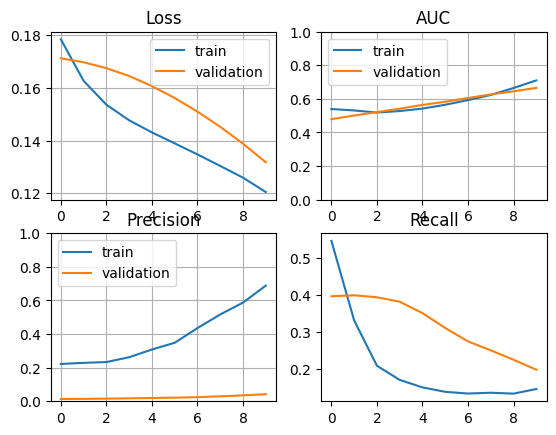

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     74280
           1       0.09      0.26      0.14      1857

    accuracy                           0.92     76137
   macro avg       0.54      0.60      0.55     76137
weighted avg       0.96      0.92      0.94     76137

Confusion Matrix:


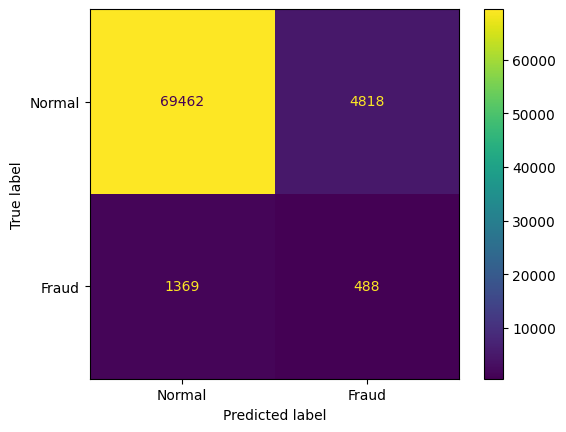

X_train_seq shape: (27656, 20, 29)
y_train_seq shape: (27656,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
865/865 [==============================] - 27s 27ms/step - loss: 0.1714 - accuracy: 0.5366 - precision: 0.1480 - recall: 0.2768 - auc: 0.4241 - val_loss: 0.1632 - val_accuracy: 0.6915 - val_precision: 0.0160 - val_recall: 0.3320 - val_auc: 0.5067
Epoch 2/10
865/865 [==============================] - 23s 27ms/step - loss: 0.1637 - accuracy: 0.6126 - precision: 0.1431 - recall: 0.1879 - auc: 0.4372 - val_loss: 0.1595 - val_accuracy: 0.7441 - val_precision: 0.0166 - val_recall: 0.2834 - val_auc: 0.5250
Epoch 3/10
865/865 [==============================] - 22s 26ms/step - loss: 0.1575 - accuracy: 0.6748 - precision: 0.1604 - recall: 0.1479 - auc: 0.4600 - val_loss: 0.1539 - val_accuracy: 0.8095 - val_precision: 0.0189 - val_recall: 0.2362 - val_auc: 0.5486
Epoch 4/10
865/865 [==============================] - 23s 27ms/step - loss: 0.1517 - accuracy: 0.7247 - 

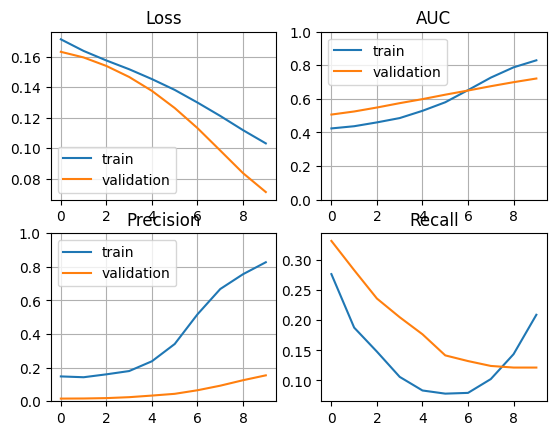

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     74280
           1       0.28      0.14      0.19      1857

    accuracy                           0.97     76137
   macro avg       0.63      0.57      0.59     76137
weighted avg       0.96      0.97      0.97     76137

Confusion Matrix:


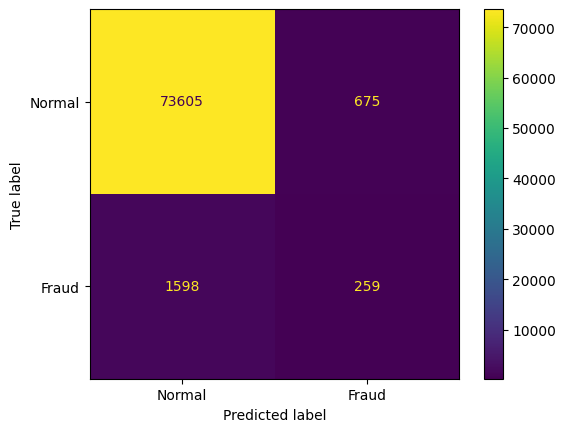

X_train_seq shape: (37192, 20, 29)
y_train_seq shape: (37192,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1163/1163 [==============================] - 33s 25ms/step - loss: 0.1668 - accuracy: 0.6220 - precision: 0.2766 - recall: 0.5510 - auc: 0.6334 - val_loss: 0.1334 - val_accuracy: 0.9670 - val_precision: 0.0968 - val_recall: 0.1511 - val_auc: 0.6765
Epoch 2/10
1163/1163 [==============================] - 27s 24ms/step - loss: 0.1515 - accuracy: 0.7406 - precision: 0.3468 - recall: 0.3362 - auc: 0.6506 - val_loss: 0.1182 - val_accuracy: 0.9801 - val_precision: 0.1550 - val_recall: 0.0810 - val_auc: 0.6881
Epoch 3/10
1163/1163 [==============================] - 27s 24ms/step - loss: 0.1382 - accuracy: 0.7936 - precision: 0.4657 - recall: 0.2179 - auc: 0.6918 - val_loss: 0.0993 - val_accuracy: 0.9837 - val_precision: 0.1500 - val_recall: 0.0243 - val_auc: 0.7030
Epoch 4/10
1163/1163 [==============================] - 28s 24ms/step - loss: 0.1242 - accuracy: 0

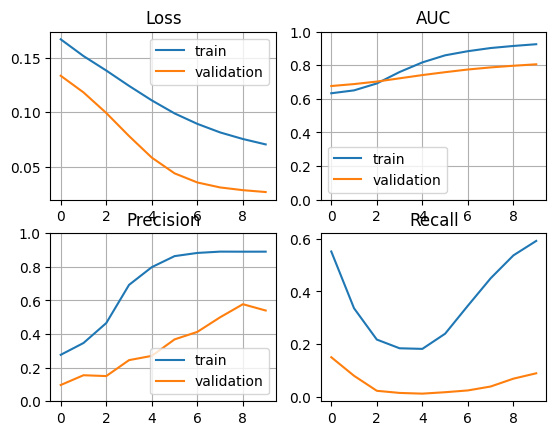

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     74280
           1       0.75      0.11      0.19      1857

    accuracy                           0.98     76137
   macro avg       0.87      0.55      0.59     76137
weighted avg       0.97      0.98      0.97     76137

Confusion Matrix:


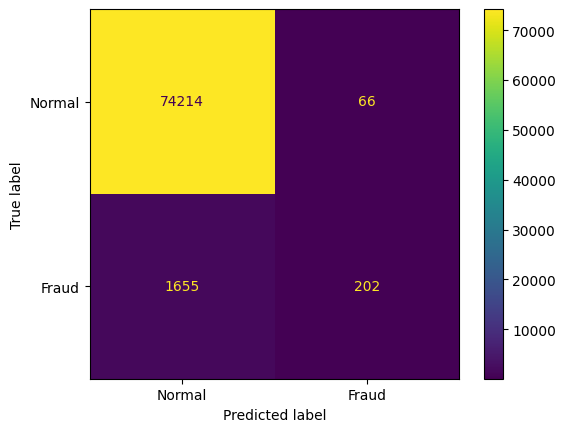

X_train_seq shape: (47010, 20, 29)
y_train_seq shape: (47010,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1470/1470 [==============================] - 38s 23ms/step - loss: 0.1671 - accuracy: 0.5997 - precision: 0.1979 - recall: 0.3279 - auc: 0.4879 - val_loss: 0.1601 - val_accuracy: 0.7324 - val_precision: 0.0160 - val_recall: 0.2861 - val_auc: 0.5182
Epoch 2/10
1470/1470 [==============================] - 33s 23ms/step - loss: 0.1506 - accuracy: 0.7486 - precision: 0.3167 - recall: 0.2220 - auc: 0.5926 - val_loss: 0.1310 - val_accuracy: 0.9550 - val_precision: 0.0258 - val_recall: 0.0567 - val_auc: 0.5955
Epoch 3/10
1470/1470 [==============================] - 33s 22ms/step - loss: 0.1302 - accuracy: 0.8124 - precision: 0.6047 - recall: 0.1788 - auc: 0.7181 - val_loss: 0.0937 - val_accuracy: 0.9814 - val_precision: 0.0444 - val_recall: 0.0135 - val_auc: 0.6808
Epoch 4/10
1470/1470 [==============================] - 33s 22ms/step - loss: 0.1085 - accuracy: 0

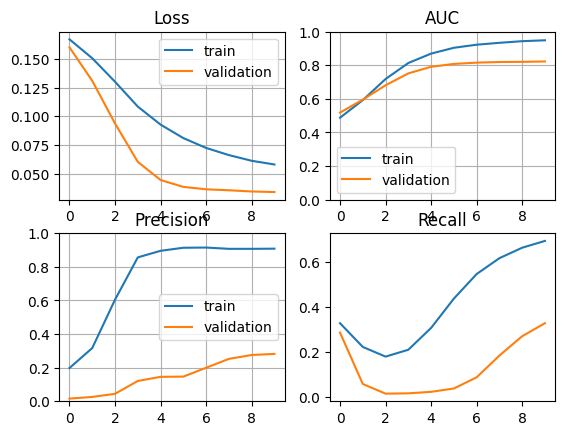

2380/2380 [==============================] - 14s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     74280
           1       0.42      0.45      0.44      1857

    accuracy                           0.97     76137
   macro avg       0.70      0.72      0.71     76137
weighted avg       0.97      0.97      0.97     76137

Confusion Matrix:


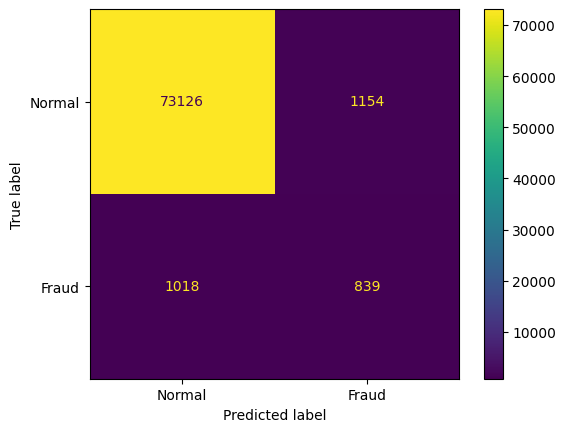

X_train_seq shape: (55928, 20, 29)
y_train_seq shape: (55928,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1748/1748 [==============================] - 41s 21ms/step - loss: 0.1651 - accuracy: 0.6279 - precision: 0.2864 - recall: 0.5769 - auc: 0.6514 - val_loss: 0.1616 - val_accuracy: 0.7026 - val_precision: 0.0251 - val_recall: 0.5128 - val_auc: 0.6465
Epoch 2/10
1748/1748 [==============================] - 36s 21ms/step - loss: 0.1451 - accuracy: 0.7857 - precision: 0.4587 - recall: 0.3981 - auc: 0.7327 - val_loss: 0.1315 - val_accuracy: 0.9045 - val_precision: 0.0397 - val_recall: 0.2389 - val_auc: 0.6743
Epoch 3/10
1748/1748 [==============================] - 37s 21ms/step - loss: 0.1168 - accuracy: 0.8419 - precision: 0.7613 - recall: 0.3053 - auc: 0.8245 - val_loss: 0.0873 - val_accuracy: 0.9664 - val_precision: 0.0741 - val_recall: 0.1134 - val_auc: 0.7090
Epoch 4/10
1748/1748 [==============================] - 37s 21ms/step - loss: 0.0902 - accuracy: 0

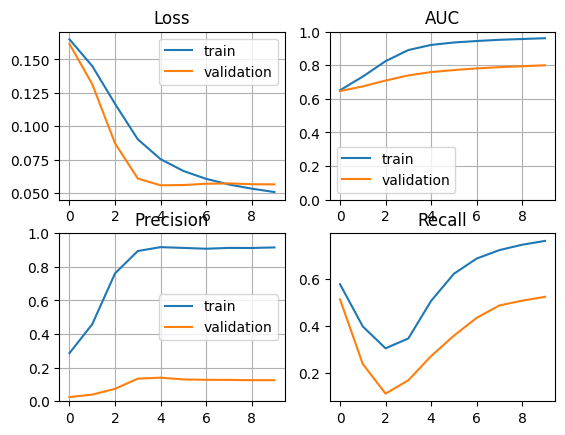

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     74280
           1       0.21      0.63      0.31      1857

    accuracy                           0.93     76137
   macro avg       0.60      0.78      0.64     76137
weighted avg       0.97      0.93      0.95     76137

Confusion Matrix:


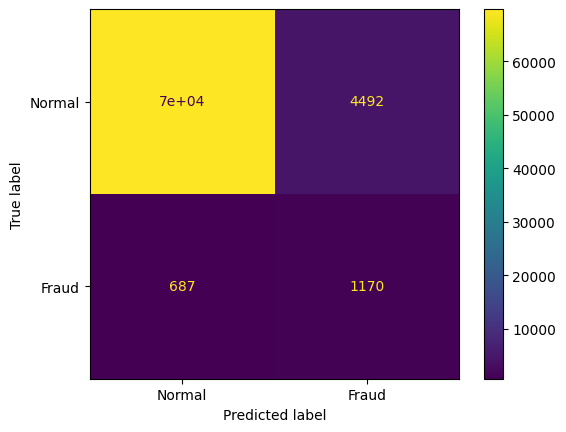

X_train_seq shape: (65570, 20, 29)
y_train_seq shape: (65570,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2050/2050 [==============================] - 46s 21ms/step - loss: 0.1704 - accuracy: 0.5763 - precision: 0.1437 - recall: 0.2256 - auc: 0.4056 - val_loss: 0.1510 - val_accuracy: 0.8533 - val_precision: 0.0150 - val_recall: 0.1404 - val_auc: 0.5416
Epoch 2/10
2050/2050 [==============================] - 41s 20ms/step - loss: 0.1497 - accuracy: 0.7498 - precision: 0.2514 - recall: 0.1269 - auc: 0.5611 - val_loss: 0.1246 - val_accuracy: 0.9644 - val_precision: 0.0341 - val_recall: 0.0526 - val_auc: 0.6376
Epoch 3/10
2050/2050 [==============================] - 41s 20ms/step - loss: 0.1244 - accuracy: 0.8078 - precision: 0.6109 - recall: 0.1069 - auc: 0.7377 - val_loss: 0.0871 - val_accuracy: 0.9828 - val_precision: 0.1359 - val_recall: 0.0337 - val_auc: 0.7003
Epoch 4/10
2050/2050 [==============================] - 41s 20ms/step - loss: 0.0997 - accuracy: 0

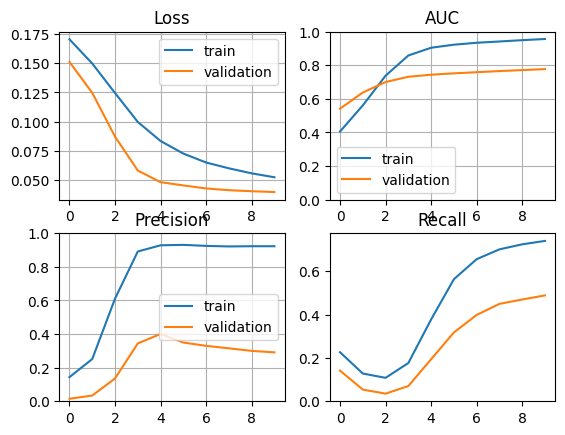

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     74280
           1       0.36      0.61      0.45      1857

    accuracy                           0.96     76137
   macro avg       0.67      0.79      0.71     76137
weighted avg       0.97      0.96      0.97     76137

Confusion Matrix:


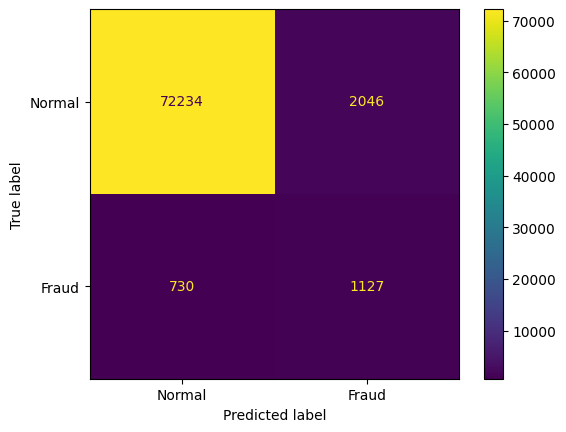

X_train_seq shape: (75212, 20, 29)
y_train_seq shape: (75212,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2351/2351 [==============================] - 53s 21ms/step - loss: 0.1681 - accuracy: 0.5984 - precision: 0.1591 - recall: 0.2353 - auc: 0.4434 - val_loss: 0.1654 - val_accuracy: 0.6993 - val_precision: 0.0112 - val_recall: 0.2254 - val_auc: 0.4387
Epoch 2/10
2351/2351 [==============================] - 47s 20ms/step - loss: 0.1447 - accuracy: 0.7702 - precision: 0.2710 - recall: 0.0881 - auc: 0.5806 - val_loss: 0.1136 - val_accuracy: 0.9825 - val_precision: 0.0323 - val_recall: 0.0067 - val_auc: 0.6123
Epoch 3/10
2351/2351 [==============================] - 47s 20ms/step - loss: 0.1199 - accuracy: 0.8021 - precision: 0.5413 - recall: 0.0675 - auc: 0.7325 - val_loss: 0.0618 - val_accuracy: 0.9854 - val_precision: 0.3333 - val_recall: 0.0013 - val_auc: 0.7303
Epoch 4/10
2351/2351 [==============================] - 48s 20ms/step - loss: 0.1016 - accuracy: 0

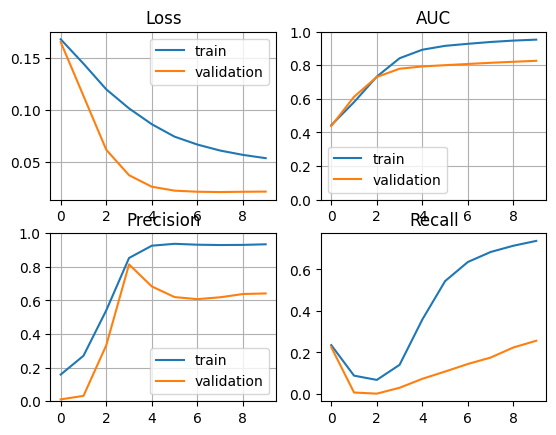

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.86      0.41      0.56      1857

    accuracy                           0.98     76137
   macro avg       0.93      0.71      0.78     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


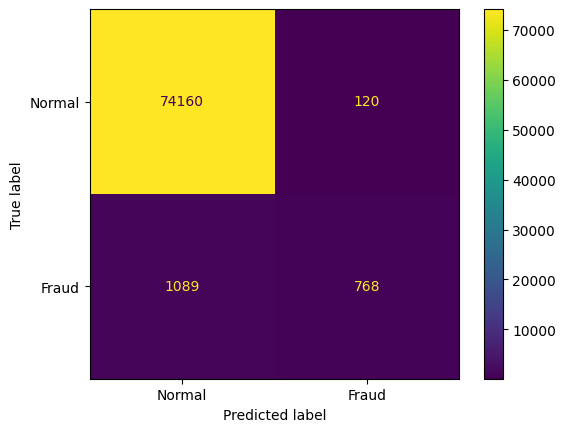

X_train_seq shape: (84753, 20, 29)
y_train_seq shape: (84753,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2649/2649 [==============================] - 58s 20ms/step - loss: 0.1654 - accuracy: 0.6351 - precision: 0.2484 - recall: 0.4070 - auc: 0.5741 - val_loss: 0.1296 - val_accuracy: 0.9777 - val_precision: 0.0608 - val_recall: 0.0364 - val_auc: 0.6457
Epoch 2/10
2649/2649 [==============================] - 53s 20ms/step - loss: 0.1386 - accuracy: 0.7882 - precision: 0.4440 - recall: 0.2347 - auc: 0.6827 - val_loss: 0.0760 - val_accuracy: 0.9854 - val_precision: 0.5455 - val_recall: 0.0081 - val_auc: 0.7193
Epoch 3/10
2649/2649 [==============================] - 53s 20ms/step - loss: 0.1085 - accuracy: 0.8277 - precision: 0.7237 - recall: 0.2238 - auc: 0.8010 - val_loss: 0.0351 - val_accuracy: 0.9854 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7816
Epoch 4/10
2649/2649 [==============================] - 53s 20ms/step - loss: 0.0894 - acc

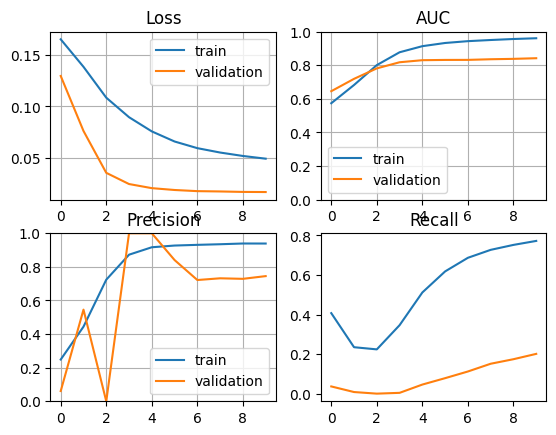

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.93      0.41      0.57      1857

    accuracy                           0.98     76137
   macro avg       0.96      0.70      0.78     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


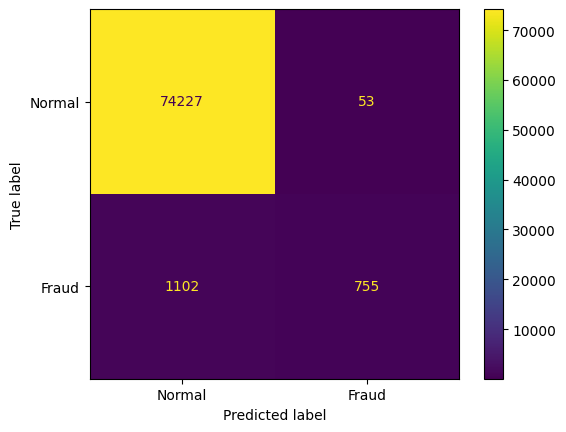

X_train_seq shape: (94283, 20, 29)
y_train_seq shape: (94283,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2947/2947 [==============================] - 64s 20ms/step - loss: 0.1590 - accuracy: 0.6825 - precision: 0.2605 - recall: 0.3196 - auc: 0.5910 - val_loss: 0.1273 - val_accuracy: 0.9691 - val_precision: 0.0450 - val_recall: 0.0553 - val_auc: 0.6563
Epoch 2/10
2947/2947 [==============================] - 58s 20ms/step - loss: 0.1228 - accuracy: 0.8098 - precision: 0.5751 - recall: 0.1885 - auc: 0.7421 - val_loss: 0.0710 - val_accuracy: 0.9822 - val_precision: 0.0733 - val_recall: 0.0189 - val_auc: 0.7118
Epoch 3/10
2947/2947 [==============================] - 58s 20ms/step - loss: 0.0928 - accuracy: 0.8453 - precision: 0.8754 - recall: 0.2642 - auc: 0.8748 - val_loss: 0.0526 - val_accuracy: 0.9786 - val_precision: 0.1906 - val_recall: 0.1430 - val_auc: 0.7458
Epoch 4/10
2947/2947 [==============================] - 58s 20ms/step - loss: 0.0756 - accuracy: 0

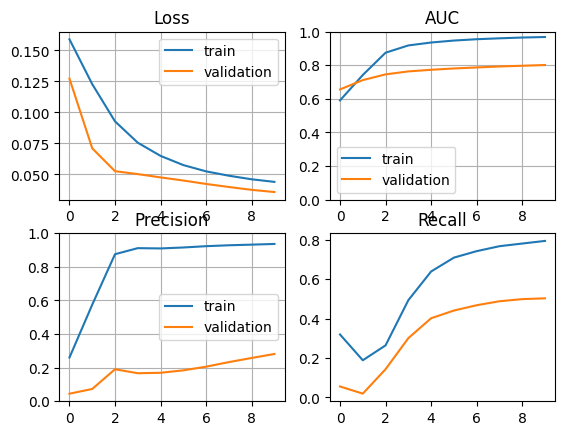

2380/2380 [==============================] - 16s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     74280
           1       0.34      0.64      0.45      1857

    accuracy                           0.96     76137
   macro avg       0.67      0.80      0.71     76137
weighted avg       0.98      0.96      0.97     76137

Confusion Matrix:


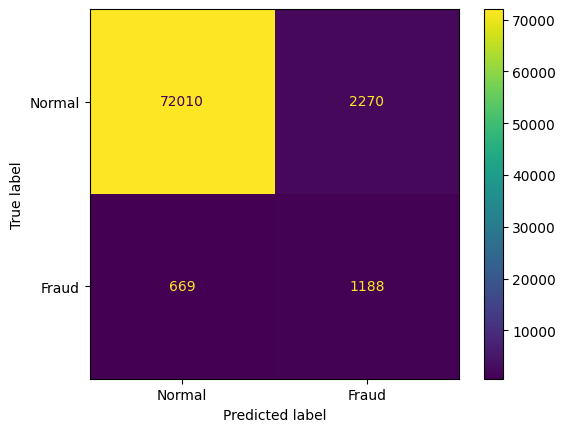

X_train_seq shape: (103818, 20, 29)
y_train_seq shape: (103818,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
3245/3245 [==============================] - 69s 20ms/step - loss: 0.1572 - accuracy: 0.7055 - precision: 0.2756 - recall: 0.2901 - auc: 0.5952 - val_loss: 0.0907 - val_accuracy: 0.9847 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6293
Epoch 2/10
3245/3245 [==============================] - 63s 19ms/step - loss: 0.1160 - accuracy: 0.8202 - precision: 0.7503 - recall: 0.1515 - auc: 0.7832 - val_loss: 0.0330 - val_accuracy: 0.9851 - val_precision: 0.1304 - val_recall: 0.0040 - val_auc: 0.7870
Epoch 3/10
3245/3245 [==============================] - 64s 20ms/step - loss: 0.0844 - accuracy: 0.8703 - precision: 0.9453 - recall: 0.3730 - auc: 0.9012 - val_loss: 0.0214 - val_accuracy: 0.9852 - val_precision: 0.3824 - val_recall: 0.0175 - val_auc: 0.8279
Epoch 4/10
3245/3245 [==============================] - 63s 20ms/step - loss: 0.0688 - a

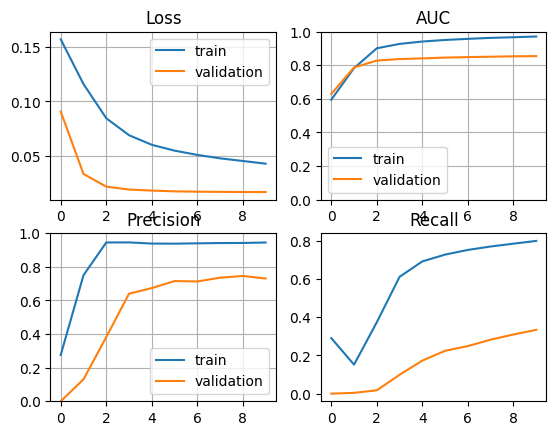

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.90      0.46      0.61      1857

    accuracy                           0.99     76137
   macro avg       0.94      0.73      0.80     76137
weighted avg       0.98      0.99      0.98     76137

Confusion Matrix:


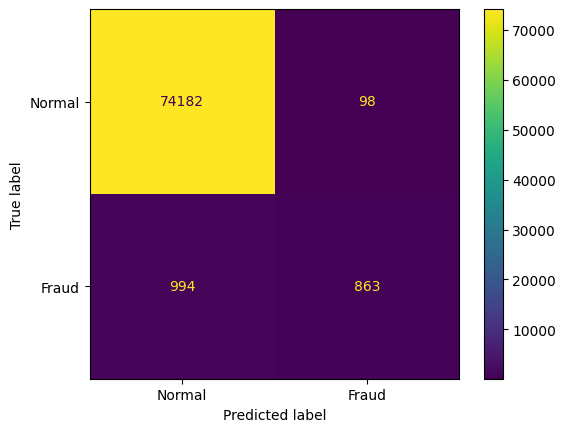

X_train_seq shape: (113385, 20, 29)
y_train_seq shape: (113385,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
3544/3544 [==============================] - 73s 19ms/step - loss: 0.1621 - accuracy: 0.6336 - precision: 0.2221 - recall: 0.3324 - auc: 0.5350 - val_loss: 0.1274 - val_accuracy: 0.9639 - val_precision: 0.0412 - val_recall: 0.0661 - val_auc: 0.5982
Epoch 2/10
3544/3544 [==============================] - 65s 18ms/step - loss: 0.1125 - accuracy: 0.8206 - precision: 0.6854 - recall: 0.1906 - auc: 0.7899 - val_loss: 0.0548 - val_accuracy: 0.9818 - val_precision: 0.1919 - val_recall: 0.0769 - val_auc: 0.6780
Epoch 3/10
3544/3544 [==============================] - 67s 19ms/step - loss: 0.0831 - accuracy: 0.8755 - precision: 0.9065 - recall: 0.4211 - auc: 0.8987 - val_loss: 0.0375 - val_accuracy: 0.9797 - val_precision: 0.2197 - val_recall: 0.1538 - val_auc: 0.7140
Epoch 4/10
3544/3544 [==============================] - 68s 19ms/step - loss: 0.0691 - accuracy:

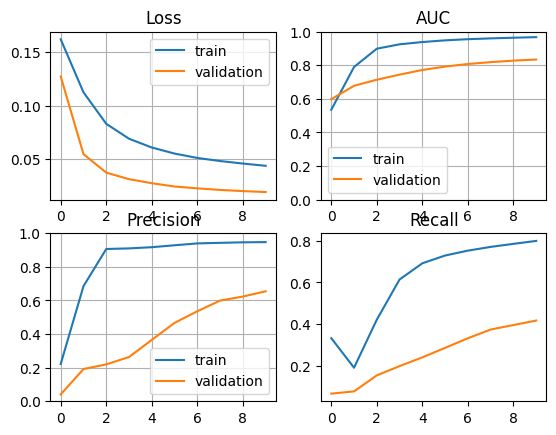

2380/2380 [==============================] - 15s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.80      0.54      0.65      1857

    accuracy                           0.99     76137
   macro avg       0.90      0.77      0.82     76137
weighted avg       0.98      0.99      0.98     76137

Confusion Matrix:


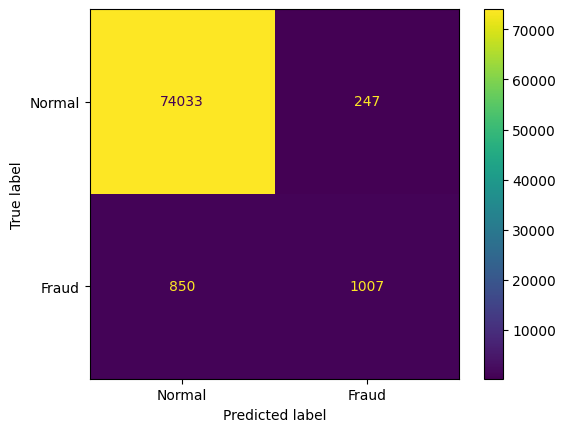

X_train_seq shape: (123020, 20, 29)
y_train_seq shape: (123020,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10


In [ ]:
models = []
hists = []
for X_train_seq, y_train_seq in zip(X_train_seq_datasets, y_train_seq_datasets):
    print(f'X_train_seq shape: {X_train_seq.shape}')
    print(f'y_train_seq shape: {y_train_seq.shape}')
    print(f'X_val_seq shape: {X_val_seq.shape}')
    print(f'y_val_seq shape: {y_val_seq.shape}')
    model, hist = train_and_plot_results(X_train_seq, y_train_seq, X_test_seq, y_test_seq, best_hp, X_val=X_val_seq, y_val=y_val_seq)
    models.append(model)
    hists.append(hist)




2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  5/247 [..............................] - ETA: 3s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 17s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 9s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 18s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  8/247 [..............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  6/247 [..............................] - ETA: 3s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 9s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/247 [..............................] - ETA: 8s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 11/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  7/247 [..............................] - ETA: 2s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  7/247 [..............................] - ETA: 2s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 16s 7ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/247 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

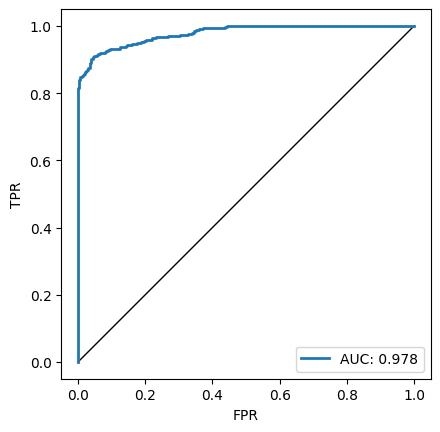

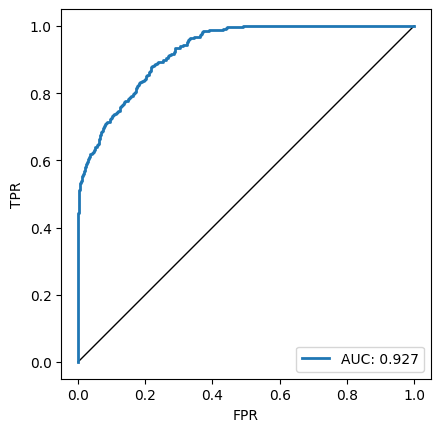

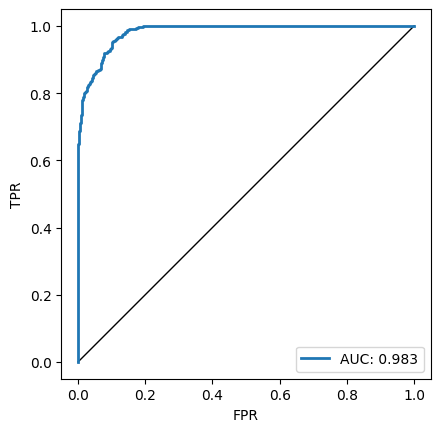

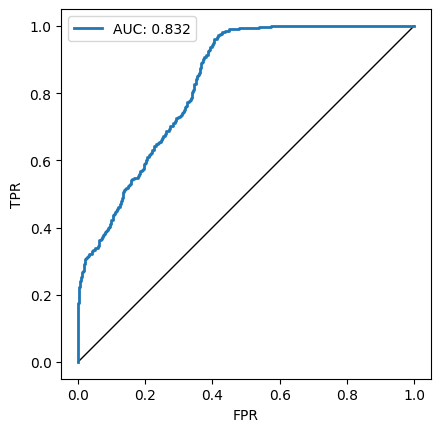

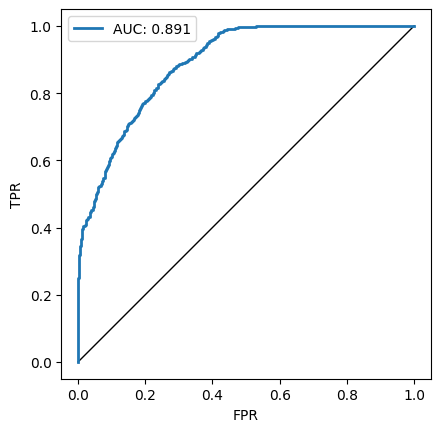

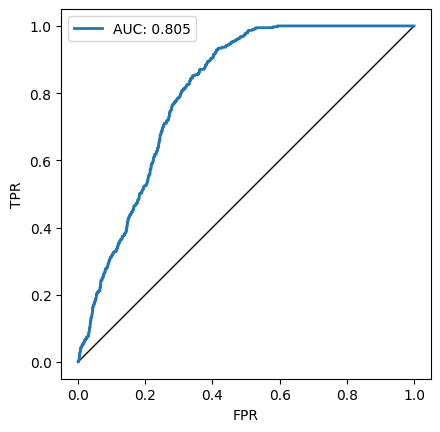

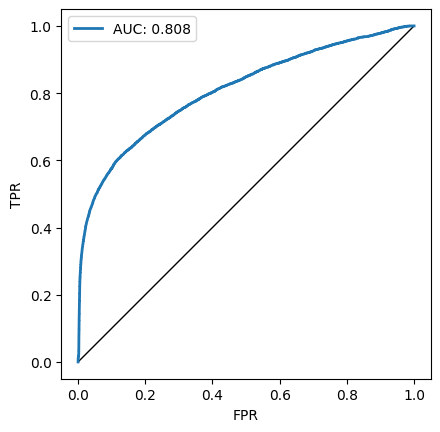

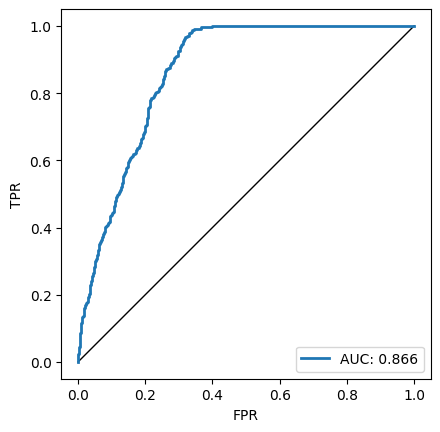

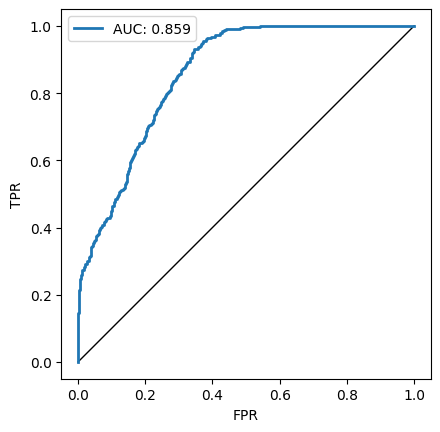

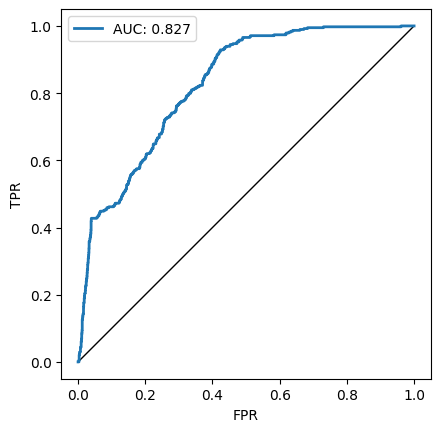

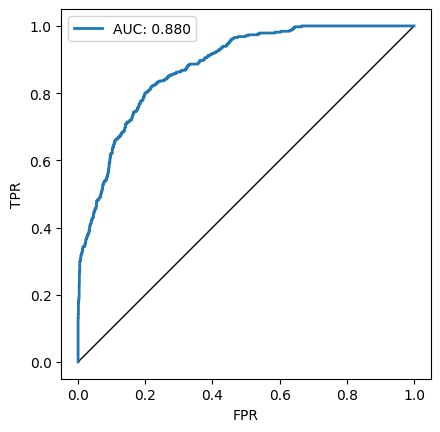

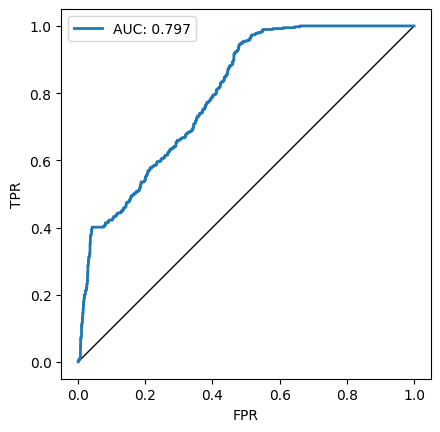

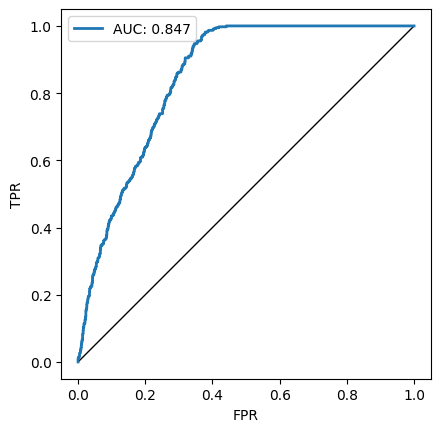

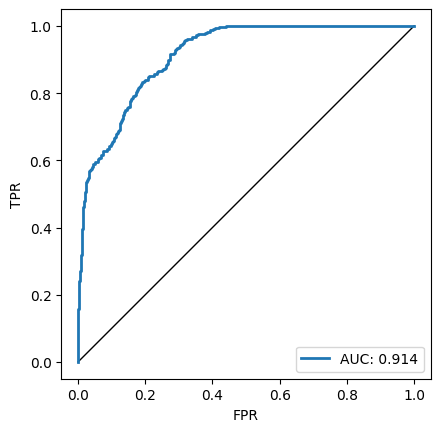

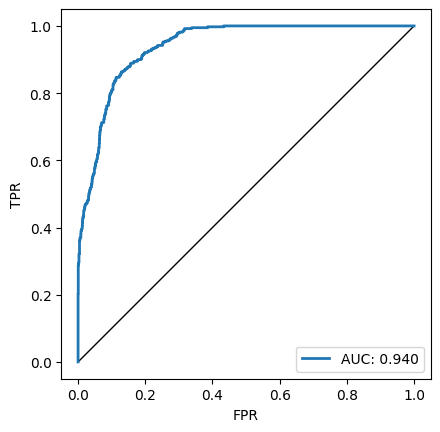

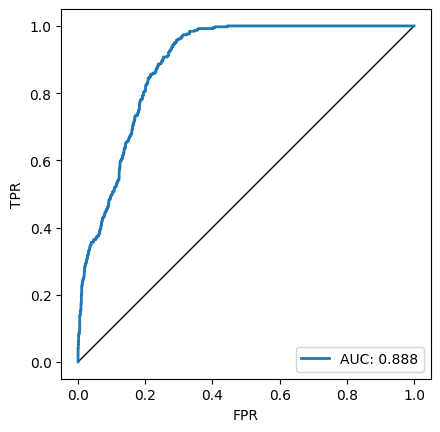

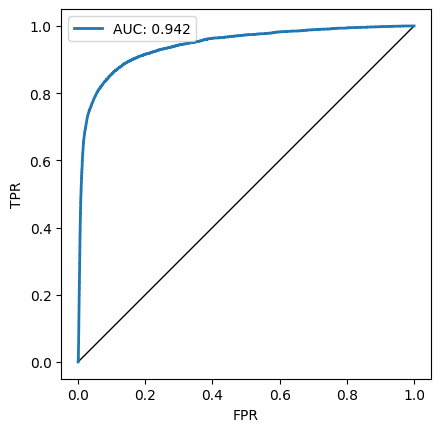

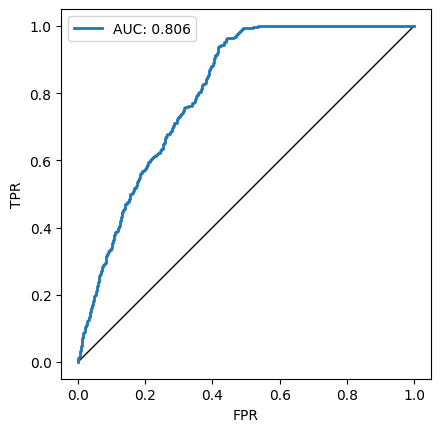

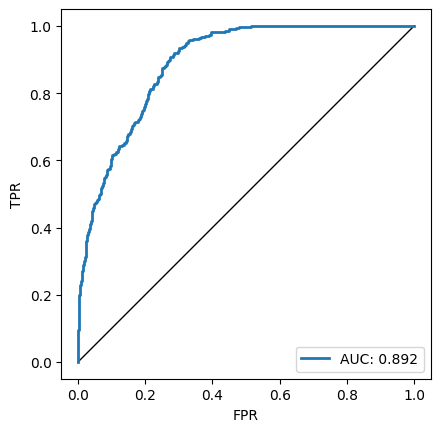

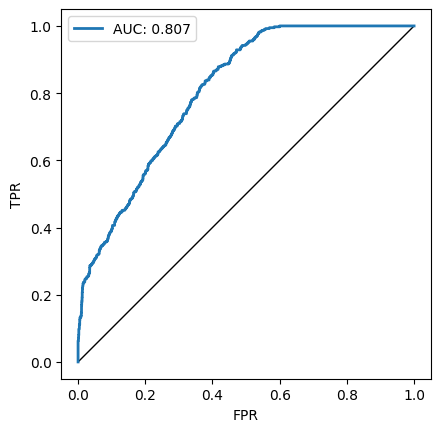

In [ ]:
from services.eval_privacy import compute_mia_attacks

attacks_results_list = []
figure_list = []
for model in models:
    attacks_result, figure = compute_mia_attacks(model, X_train_seq_datasets_original[0], X_test_seq, y_train_seq_datasets_original[0], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

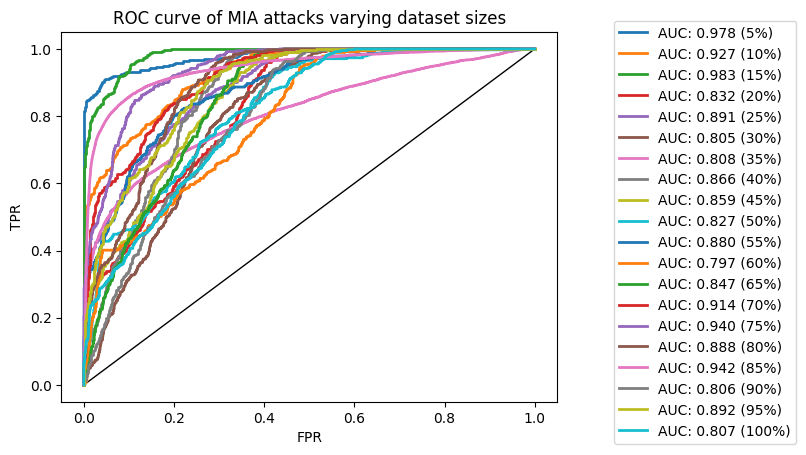

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

attacks_results_list[0].get_result_with_max_auc().roc_curve.fpr

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

for i, attacks_result in enumerate(attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    plt.plot(x, y, lw=2, label=f'AUC: {metrics.auc(x, y):.3f} ({(i+1)*5}%)')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
from sklearn.metrics import classification_report

classification_reports = []
for model, X_train_seq, y_train_seq in zip(models, X_train_seq_datasets, y_train_seq_datasets):
    y_pred = model.predict(X_test_seq)
    cr = classification_report(y_test_seq, y_pred > 0.5, output_dict=True)
    classification_reports.append(cr)

2380/2380 [==============================] - 15s 6ms/step


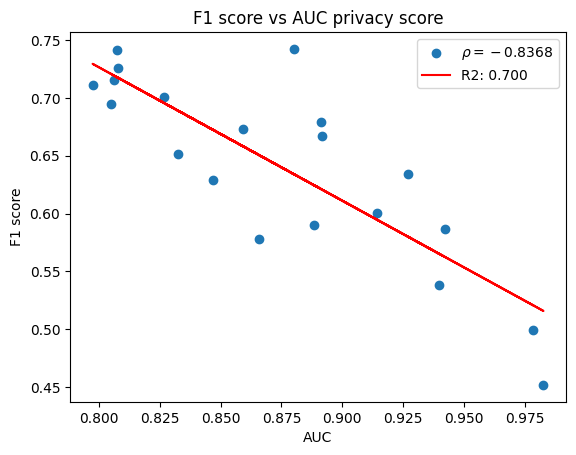

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

aucs = []
f1_scores = []
for cr, attacks_result in zip(classification_reports, attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    f1_score = cr['1']['f1-score']

    aucs.append(auc)
    f1_scores.append(f1_score)

aucs = np.array(aucs).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(aucs, f1_scores)

rho = np.corrcoef(aucs.flatten(), f1_scores)[0, 1]
r2 = linear_model.score(aucs, f1_scores)

fig = plt.figure()
plt.title('F1 score vs AUC privacy score')
plt.scatter(aucs, f1_scores)
plt.plot(aucs, linear_model.predict(aucs), color='red')
plt.legend([fr'$\rho = {rho:.4f}$', f'R2: {r2:.3f}'])
plt.xlabel('AUC')
plt.ylabel('F1 score')
plt.show()